<h1 style="color:red;">Imports and initialization</h1>

In [89]:
import numpy as np 
from numpy.fft import fft,fft2,ifft,ifft2,fftshift
import matplotlib.pyplot as plt  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from Functions import *
import cv2 as cv 
from skimage.util import random_noise 


In [43]:
#Global values for settings and ect
axis_font = {'fontname':'Arial', 'size':'16'}

<h2 style="color:gold;"> 1.1.2-1.1.3 </h2>

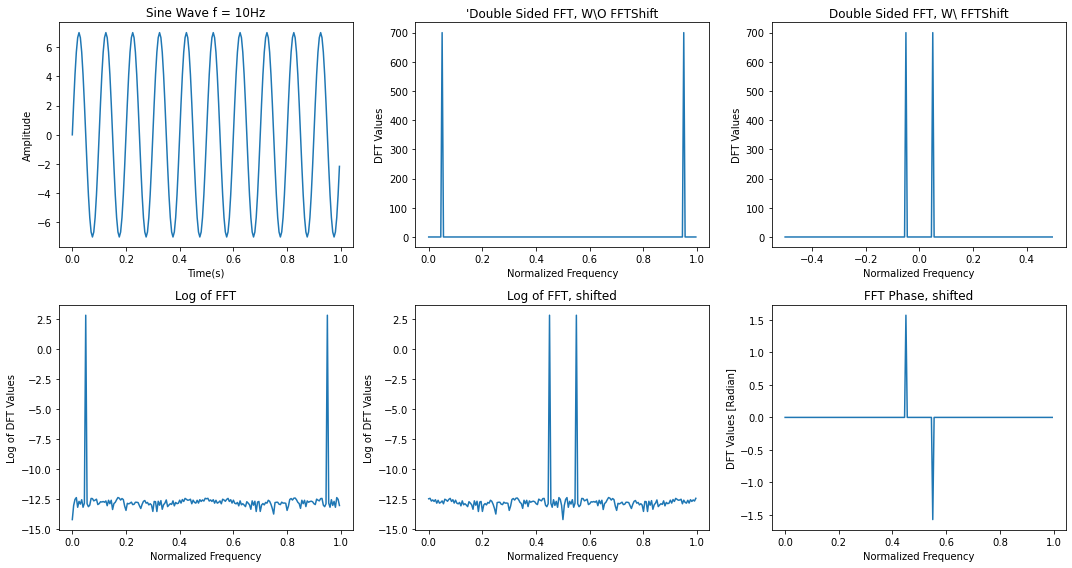

In [3]:
sinFunction , t = SampledCosine(returnSinus=True)
titles = [
          ["Sine Wave f = 10Hz","'Double Sided FFT, W\O FFTShift","Double Sided FFT, W\ FFTShift"],
          ["Log of FFT","Log of FFT, shifted","FFT Phase, shifted"]
         ]
xtitles =[["Time(s)"],[]]
xtitles[0].extend(["Normalized Frequency"]*2)
xtitles[1].extend(["Normalized Frequency"]*3)
ytitles = [["Amplitude"],[]]
ytitles[0].extend(["DFT Values"]*2)
ytitles[1].extend(["Log of DFT Values"]*2); ytitles[1].extend(["DFT Values [Radian]"])
plots = [[],[]]
plots[0].append(sinFunction)
plots[0].append(np.abs(fft(sinFunction)))
plots[0].append(fftshift(plots[0][1]))
plots[1].append(np.log10(plots[0][1]))
plots[1].append(np.log10(plots[0][2]))
plots[1].append(np.angle(fftshift(fft(sinFunction))))
plots[1][2][np.abs(plots[0][2])<1]=0
xAxis = [[t,np.arange(0,200)/200,np.arange(-100,100)/200],[]]
xAxis[1].extend([np.arange(0,200)/200]*3)
PlotingSignalWithFFT(plots,xAxis,titles,xtitles,ytitles)

<h2 style="color:gold;"> 1.1.4 </h2>

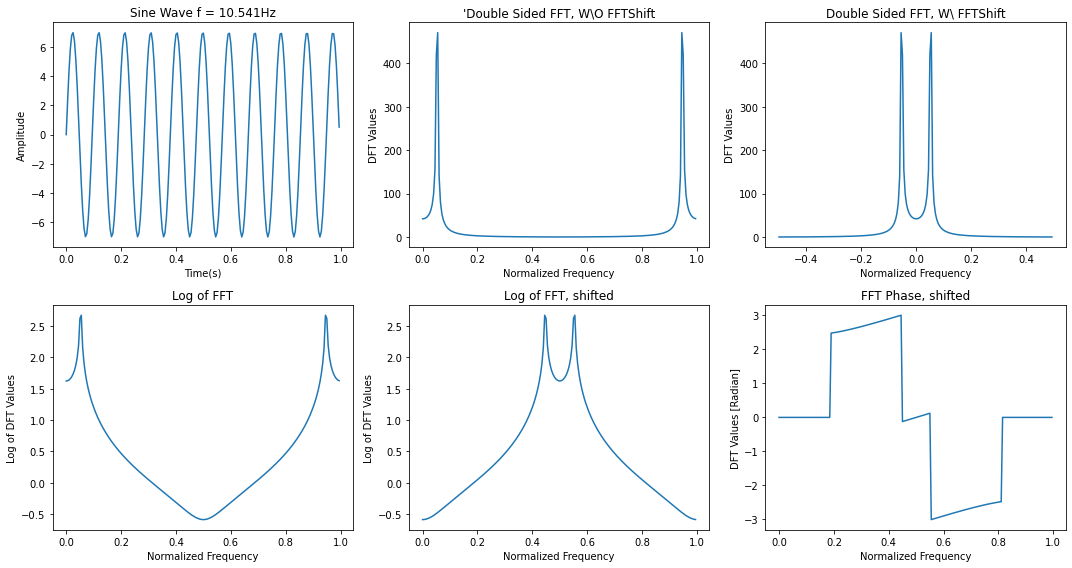

In [4]:
cosineFreq = 10.541
sinFunction , t = SampledCosine(cosineFreq=cosineFreq,returnSinus=True)
sinFFT = fft(sinFunction)
titles = [
          [f"Sine Wave f = {cosineFreq}Hz","'Double Sided FFT, W\O FFTShift","Double Sided FFT, W\ FFTShift"],
          ["Log of FFT","Log of FFT, shifted","FFT Phase, shifted"]
         ]
xtitles =[["Time(s)"],[]]
xtitles[0].extend(["Normalized Frequency"]*2)
xtitles[1].extend(["Normalized Frequency"]*3)
ytitles = [["Amplitude"],[]]
ytitles[0].extend(["DFT Values"]*2)
ytitles[1].extend(["Log of DFT Values"]*2); ytitles[1].extend(["DFT Values [Radian]"])
plots = [[],[]]
plots[0].append(sinFunction)
plots[0].append(np.abs(sinFFT))
plots[0].append(np.abs(fftshift(sinFFT)))
plots[1].append(np.log10(np.abs(sinFFT)))
plots[1].append(np.log10(np.abs(fftshift(sinFFT))))
plots[1].append(np.angle(fftshift(sinFFT)))
plots[1][2][np.abs(plots[0][2])<1]=0
xAxis = [[t,np.arange(0,200)/200,np.arange(-100,100)/200],[]]
xAxis[1].extend([np.arange(0,200)/200]*3)
PlotingSignalWithFFT(plots,xAxis,titles,xtitles,ytitles)

<h2 style="color:gold;"> 1.2 - Inverse Transform </h2>

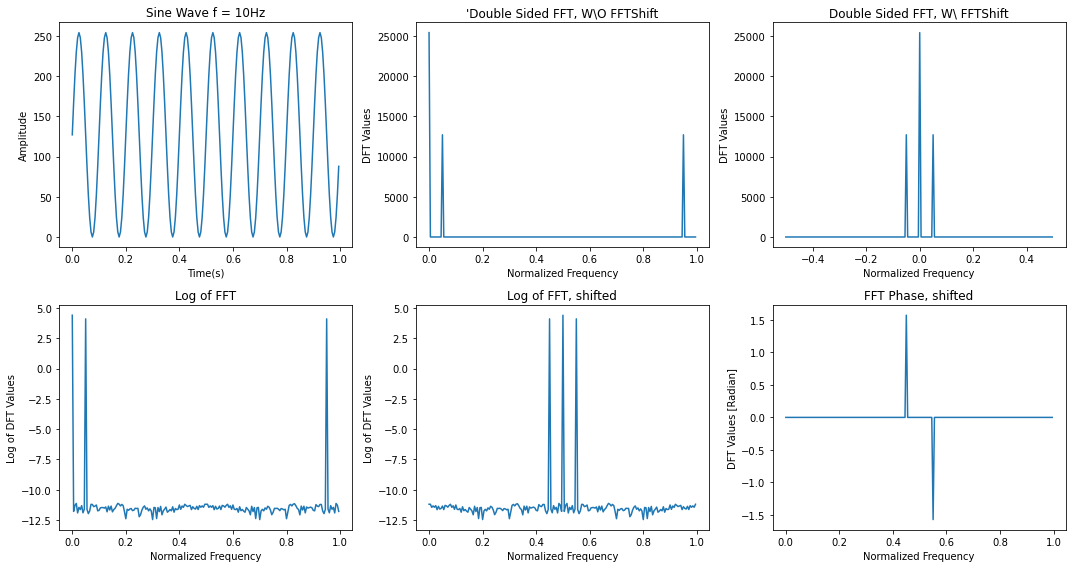

In [5]:
cosineFreq = 10 ; linspace = 1; sampleFreq = 200 ; amp = 1
sinFunction , t = SampledCosine(timeLenght=linspace,cosineFreq=cosineFreq,freqSample=sampleFreq,amplitude=amp,returnSinus=True)
sinFunction = 127*(sinFunction+1)
sinFFT = fft(sinFunction)
titles = [
          [f"Sine Wave f = {cosineFreq}Hz","'Double Sided FFT, W\O FFTShift","Double Sided FFT, W\ FFTShift"],
          ["Log of FFT","Log of FFT, shifted","FFT Phase, shifted"]
         ]
xtitles =[["Time(s)"],[]]
xtitles[0].extend(["Normalized Frequency"]*2)
xtitles[1].extend(["Normalized Frequency"]*3)
ytitles = [["Amplitude"],[]]
ytitles[0].extend(["DFT Values"]*2)
ytitles[1].extend(["Log of DFT Values"]*2); ytitles[1].extend(["DFT Values [Radian]"])
plots = [[],[]]
plots[0].append(sinFunction)
plots[0].append(np.abs(sinFFT))
plots[0].append(np.abs(fftshift(sinFFT)))
plots[1].append(np.log10(np.abs(sinFFT)))
plots[1].append(np.log10(np.abs(fftshift(sinFFT))))
plots[1].append(np.angle(fftshift(sinFFT)))
plots[1][2][np.abs(plots[0][2])<1]=0
xAxis = [[t,np.arange(0,200)/200,np.arange(-100,100)/200],[]]
xAxis[1].extend([np.arange(0,200)/200]*3)
PlotingSignalWithFFT(plots,xAxis,titles,xtitles,ytitles)

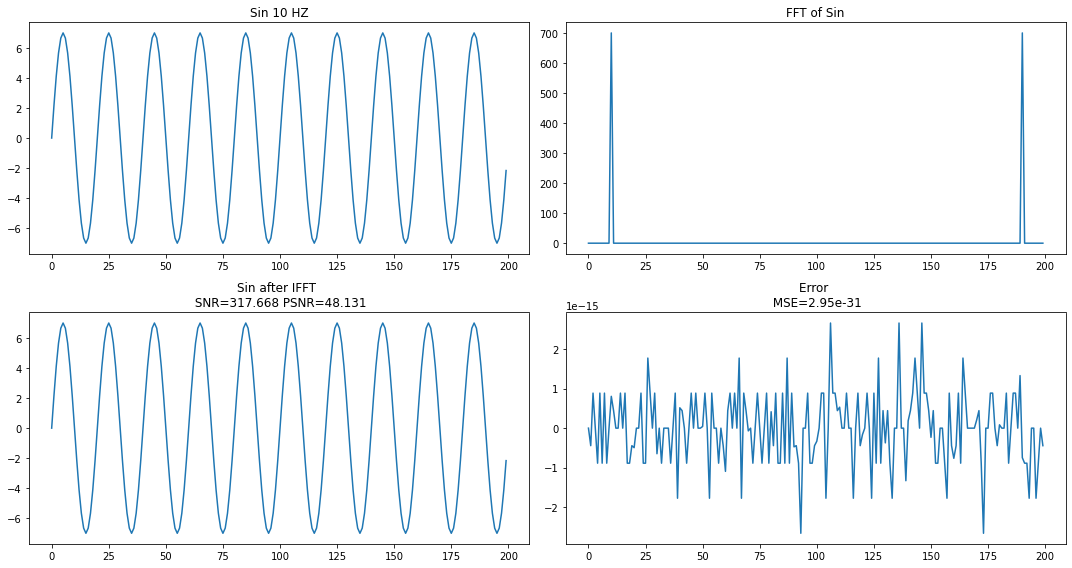

In [6]:
time = 1;Fs = 200;Fsig = 10;amp = 7
sinFunction , t = SampledCosine(time,Fs,Fsig,amp,True)
plots = [[sinFunction],[]] ; plots[0].append(np.abs(fft(sinFunction)))
plots[1].append(ifft(fft(sinFunction))) ; plots[1].append(sinFunction-plots[1][0])
MSE ,SNR,PSNR = ImageDataAnalysis(sinFunction,plots[1][0])
titles = [
          [f"Sin {Fsig} HZ","FFT of Sin"],
          [f"Sin after IFFT \n SNR={SNR} PSNR={PSNR}",f"Error \n MSE={np.format_float_scientific(MSE, precision = 2)}"]
         ]
fig ,axis = plt.subplots(2,2,figsize=[15,8])
for (titleLine , ax , plotLine)  in itertools.zip_longest(titles,axis,plots):
    for (title ,a , plot ) in itertools.zip_longest(titleLine,ax,plotLine):
        a.set_title(title)
        a.plot(np.real(plot))
plt.tight_layout()

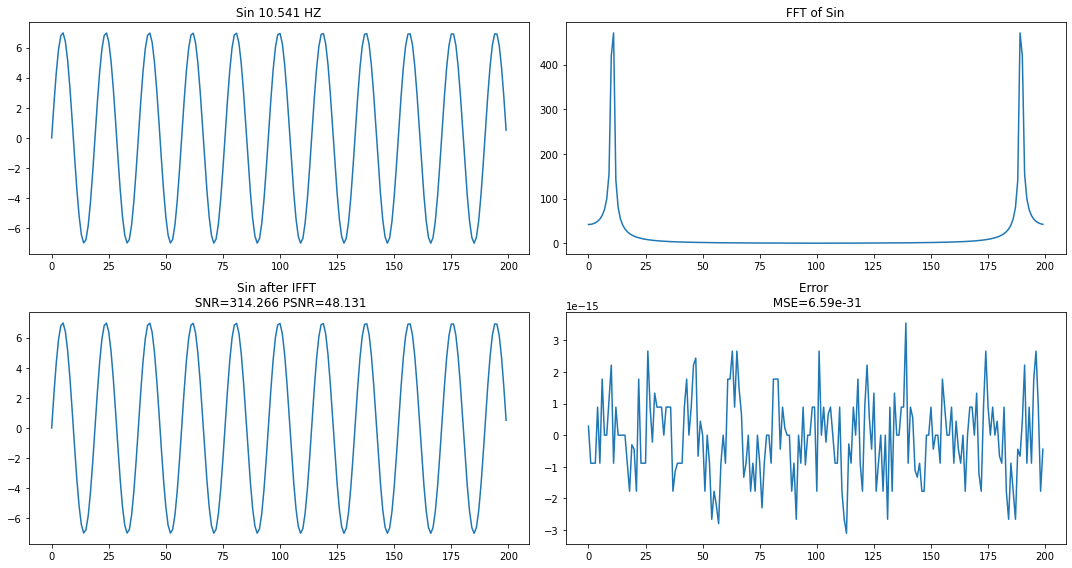

In [7]:
time = 1;Fs = 200;Fsig = 10.541;amp = 7
sinFunction , t = SampledCosine(time,Fs,Fsig,amp,True)
plots = [[sinFunction],[]] ; plots[0].append(np.abs(fft(sinFunction)))
plots[1].append(ifft(fft(sinFunction))) ; plots[1].append(sinFunction-plots[1][0])
MSE ,SNR,PSNR = ImageDataAnalysis(sinFunction,plots[1][0])
titles = [
          [f"Sin {Fsig} HZ","FFT of Sin"],
          [f"Sin after IFFT \n SNR={SNR} PSNR={PSNR}",f"Error \n MSE={np.format_float_scientific(MSE, precision = 2)}"]
         ]
fig ,axis = plt.subplots(2,2,figsize=[15,8])
for (titleLine , ax , plotLine)  in itertools.zip_longest(titles,axis,plots):
    for (title ,a , plot ) in itertools.zip_longest(titleLine,ax,plotLine):
        a.set_title(title)
        a.plot(np.real(plot))
plt.tight_layout()

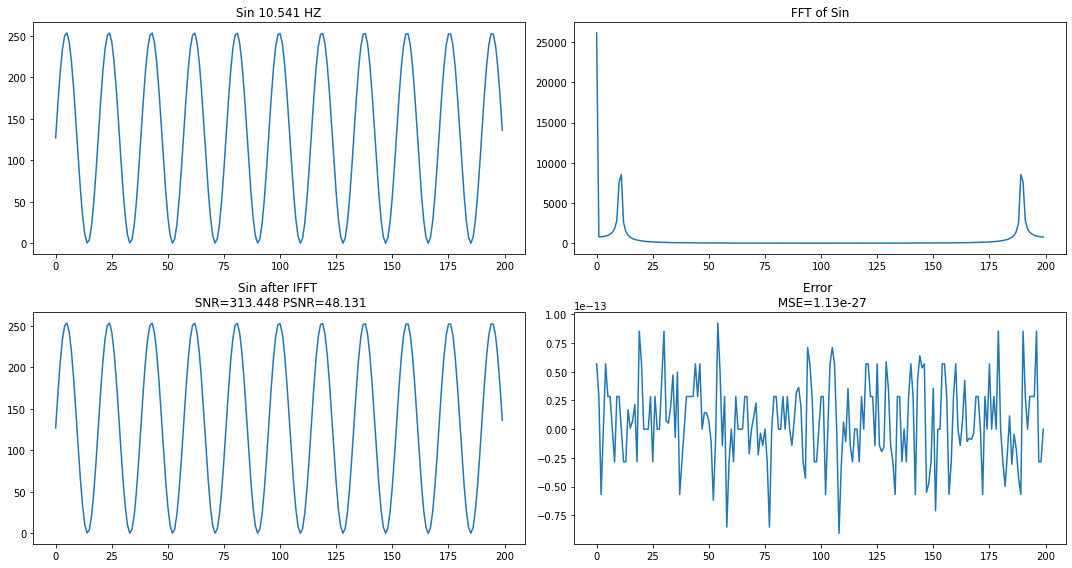

In [8]:
time = 1;Fs = 200;Fsig = 10.541;amp = 1
sinFunction , t = SampledCosine(time,Fs,Fsig,amp,True)
sinFunction = 127*(sinFunction+1)
plots = [[sinFunction],[]] ; plots[0].append(np.abs(fft(sinFunction)))
plots[1].append(ifft(fft(sinFunction))) ; plots[1].append(sinFunction-plots[1][0])
MSE ,SNR,PSNR = ImageDataAnalysis(sinFunction,plots[1][0])
titles = [
          [f"Sin {Fsig} HZ","FFT of Sin"],
          [f"Sin after IFFT \n SNR={SNR} PSNR={PSNR}",f"Error \n MSE={np.format_float_scientific(MSE, precision = 2)}"]
         ]
fig ,axis = plt.subplots(2,2,figsize=[15,8])
for (titleLine , ax , plotLine)  in itertools.zip_longest(titles,axis,plots):
    for (title ,a , plot ) in itertools.zip_longest(titleLine,ax,plotLine):
        a.set_title(title)
        a.plot(np.real(plot))
plt.tight_layout()

<h2 style="color:gold;"> 1.3 - Convolution </h2>

In [9]:
p = [1,2,3,1,2]
h = [1,1]
g = np.convolve(p,h)
print("g=",g)

g= [1 3 5 4 3 2]


In [10]:
wantedSize = 6 ; pPadded = p ; hPadded = h
pPadded.extend([0]*(wantedSize-np.size(p)))
hPadded.extend([0]*(wantedSize-np.size(h)))
G = fft(pPadded) * fft(hPadded)
newG = np.array(np.real(ifft(G)),dtype='int')
print ("g=",newG)

g= [1 3 5 4 3 2]


<h2 style="color:gold;"> 1.4 - Filtering </h2>

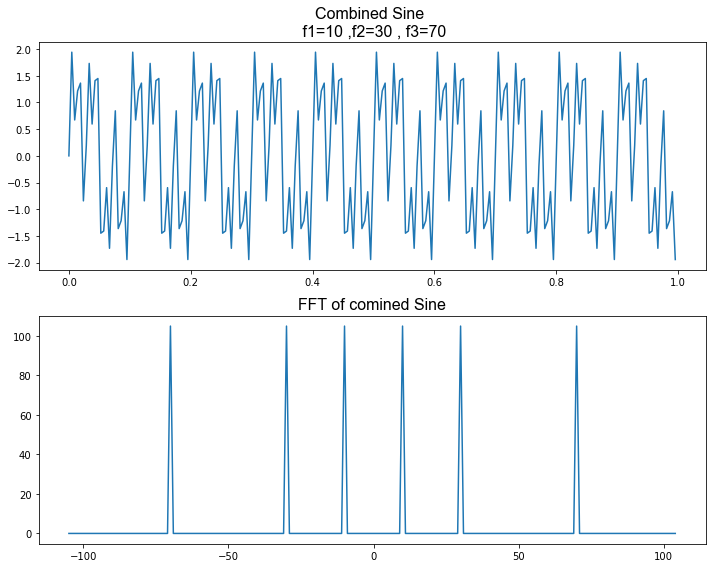

In [24]:
time = 1; Fs = 210; Fsig1 = 10; Fsig2 = 30 ; Fsig3 = 70 ; amp = 1
combinedSin = SampledCosine(time,Fs,Fsig1,amp,True,False) + SampledCosine(time,Fs,Fsig2,amp,True,False) + SampledCosine(time,Fs,Fsig3,amp,True,False)
_,t = SampledCosine(time,Fs,Fsig1,amp,True)
plots = [combinedSin]
xAxis = [t,np.arange(-Fs/2,Fs/2)]
plots.append(np.abs(fftshift(fft(combinedSin))))
fig ,axis  = plt.subplots(2,1,figsize=[10,8])
titles = [f"Combined Sine \n f1={Fsig1} ,f2={Fsig2} , f3={Fsig3}" , "FFT of comined Sine"]
for (ax,plot,title,x) in itertools.zip_longest(axis,plots,titles,xAxis):
    ax.plot(x,plot)
    ax.set_title(title,**axis_font)
plt.tight_layout()

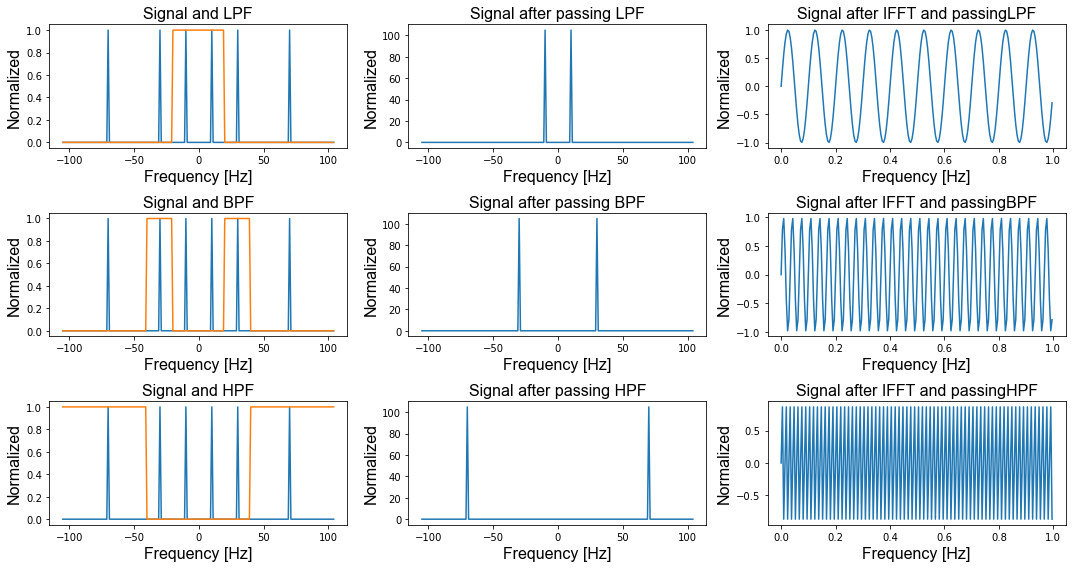

In [55]:
time = 1; Fs = 210; Fsig1 = 10; Fsig2 = 30 ; Fsig3 = 70 ; amp = 1
combinedSin = SampledCosine(time,Fs,Fsig1,amp,True,False) + SampledCosine(time,Fs,Fsig2,amp,True,False) + SampledCosine(time,Fs,Fsig3,amp,True,False)
_,t = SampledCosine(time,Fs,Fsig1,amp)
combinedSinFFT = fft(combinedSin)
normalizedSinFFT = combinedSinFFT/np.amax(combinedSinFFT)
freqDomain = np.arange(-Fs/2,Fs/2)
sizeOfSignal = np.size(combinedSin)
freqLPF = 20 ; LPF = np.ones(sizeOfSignal,dtype='int')
freqHPF = 40 ; HPF = np.ones(sizeOfSignal,dtype='int')
LPF[freqLPF:np.size(combinedSin)-freqLPF] = 0
HPF[:freqHPF] = 0 ; HPF[sizeOfSignal-freqHPF:] = 0
BPF = np.zeros(sizeOfSignal,dtype='int')
BPF[freqLPF:freqHPF] = 1 ; BPF[sizeOfSignal-freqHPF:sizeOfSignal-freqLPF] = 1
filters = [LPF,BPF,HPF]
filteredSignal = []
signals = []
for filter in filters:
    temp=filter*combinedSinFFT
    filteredSignal.append(temp)
    signals.append(np.real(ifft(temp)))

filtersName = ["LPF","BPF","HPF"]
titles = ["Signal and ", "Signal after passing " ,"Signal after IFFT and passing"]
xlable = "Frequency [Hz]"
ylable = "Normalized"
fig , axis = plt.subplots(3,3,figsize=[15,8])
for (index ,ax) in itertools.zip_longest(range(0,3),axis):
    for (title,a,flag) in itertools.zip_longest(titles,ax,range(0,3)):
        if flag ==0:
            a.plot(freqDomain,np.abs(fftshift(normalizedSinFFT)),freqDomain,fftshift(filters[index]))
        elif flag ==1:
            a.plot(freqDomain,np.abs(fftshift(filteredSignal[index])))
        elif flag ==2:
            a.plot(t,signals[index])
        a.set_title(title + filtersName[index],**axis_font)
        a.set_xlabel(xlable,**axis_font)
        a.set_ylabel(ylable,**axis_font)
plt.tight_layout()

<h2 style="color:gold;"> 2.2.1 - Analyze Image </h2>

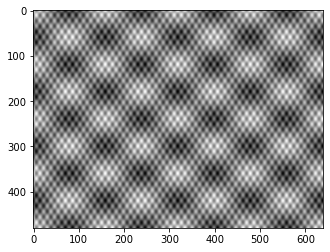

In [101]:
img = np.array(cv.imread('Images\\imageToAnalyze.png',cv.IMREAD_GRAYSCALE),dtype='uint8')
plt.imshow(img,cmap="gray")

<h2 style="color:gold;"> 2.2.1 a+b </h2>

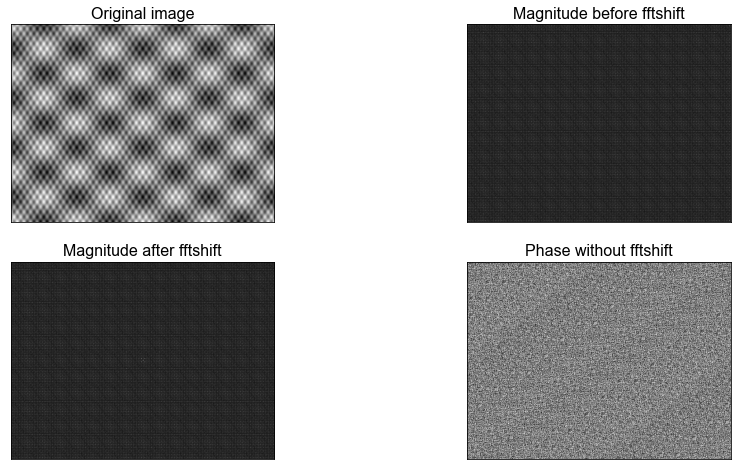

In [47]:
images = [img]
imgFFT = fft2(img)
images.append(np.log10(np.abs(imgFFT)))
images.append(fftshift(np.log10(np.abs(imgFFT))))
images.append(np.angle(imgFFT))
titles = ["Original image","Magnitude before fftshift","Magnitude after fftshift","Phase without fftshift"]
fig , axis = plt.subplots(2,2 , figsize=[15,8])
for (index,ax) in itertools.zip_longest(range(0,2),axis):
    for (a,index2) in itertools.zip_longest(ax,range(0,2)):
        a.imshow(images[index2+index*2],cmap="gray")
        a.set_title(titles[index2+index*2],**axis_font)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)

<h2 style="color:gold;"> 2.2.1 c </h2>

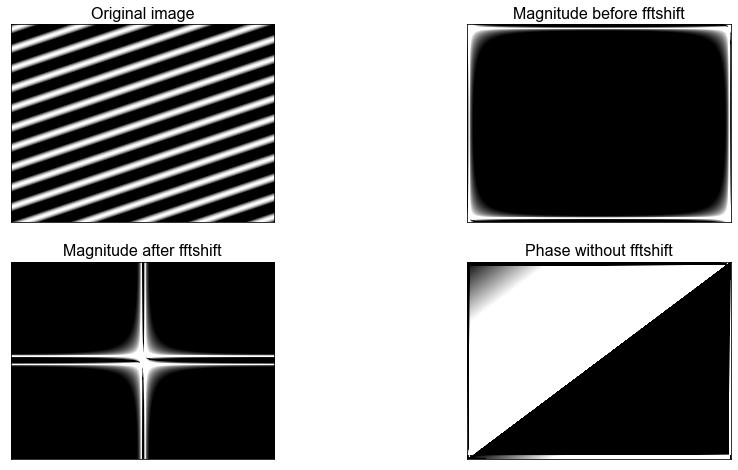

In [87]:
shape=np.shape(img)
fx = 4.5 ; fy = 10
x = np.linspace(0,1,shape[1]) ; y = np.linspace(0,1,shape[0])
X = np.array([x]*shape[0]) ; Y = np.array([y]*shape[1]).T
signal2 = np.sin(2*np.pi * (fx*X + fy*Y))
images = [signal2]
imgFFT = fft2(signal2)
images.append(np.log10(np.abs(imgFFT)))
images.append(fftshift(np.log10(np.abs(imgFFT))))
images.append(np.angle(imgFFT))
titles = ["Original image","Magnitude before fftshift","Magnitude after fftshift","Phase without fftshift"]
fig , axis = plt.subplots(2,2 , figsize=[15,8])
for (index,ax) in itertools.zip_longest(range(0,2),axis):
    for (a,index2) in itertools.zip_longest(ax,range(0,2)):
        a.imshow(images[index2+index*2],cmap="gray",vmin=0 ,vmax=1.0)
        a.set_title(titles[index2+index*2],**axis_font )
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)

<h2 style="color:gold;"> 2.2.1 d </h2>
All 3d stuff missing for now its pain in the ass to siplay it

<h2 style="color:gold;"> 2.2.1 e </h2>

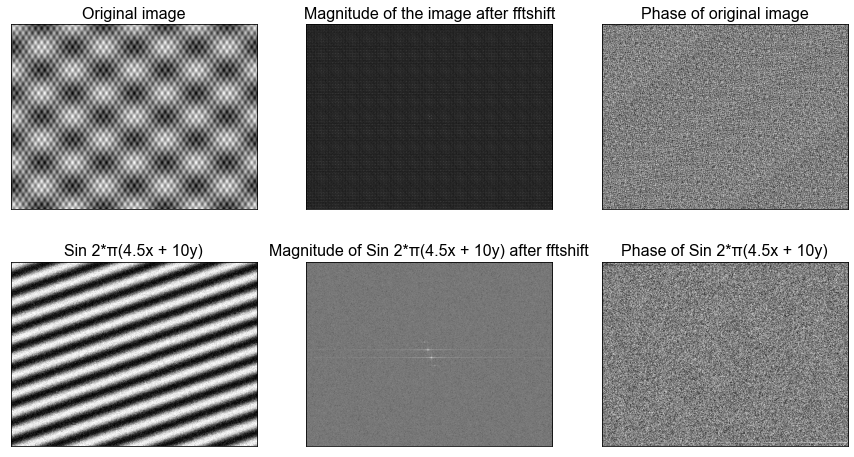

In [104]:
shape=np.shape(img)
fx = 4.5 ; fy = 10 ; mu =0 ; v =0.1
x = np.linspace(0,1,shape[1]) ; y = np.linspace(0,1,shape[0])
X = np.array([x]*shape[0]) ; Y = np.array([y]*shape[1]).T
signal2 = np.sin(2*np.pi * (fx*X + fy*Y))
signal2 = random_noise(signal2,mode='gaussian',seed=1,mean=mu,var=v)
images = [img]
imgFFT = fft2(img)
sinFFT = fft2(signal2)
images.append(fftshift(np.log10(np.abs(imgFFT))))
images.append(np.angle(imgFFT))
images.append(signal2)
images.append(fftshift(np.log10(np.abs(sinFFT))))
images.append(np.angle(sinFFT))
titles = ["Original image","Magnitude of the image after fftshift","Phase of original image",
          f"Sin 2*\u03C0({fx}x + {fy}y)",f"Magnitude of Sin 2*\u03C0({fx}x + {fy}y) after fftshift",f"Phase of Sin 2*\u03C0({fx}x + {fy}y)"]
fig , axis = plt.subplots(2,3 , figsize=[15,8])
for (index,ax) in itertools.zip_longest(range(0,2),axis):
    for (a,index2) in itertools.zip_longest(ax,range(0,3)):
        a.imshow(images[index2+index*3],cmap="gray")
        a.set_title(titles[index2+index*3],**axis_font )
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)

<h2 style="color:gold;"> 2.3.1 e </h2>

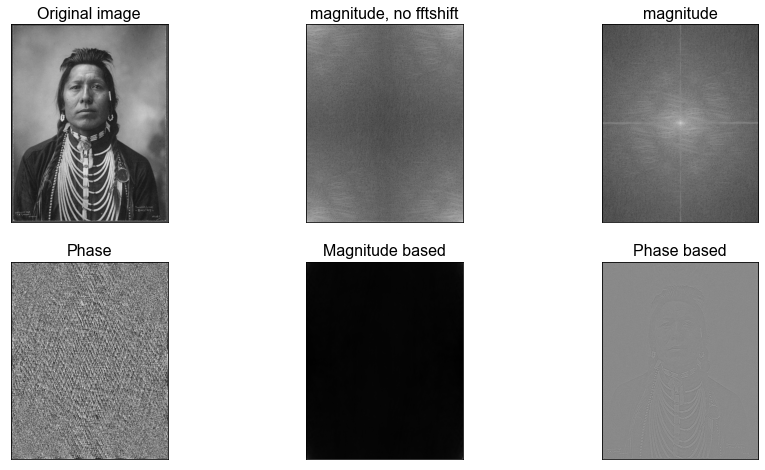

In [108]:
img = np.array(cv.imread('Images\\indian.jfif',cv.IMREAD_GRAYSCALE),dtype='uint8')
imgFFT = fft2(img)
plots = [img]
plots.append(np.log10(np.abs(imgFFT)))
plots.append(np.log10(np.abs(fftshift(imgFFT))))
plots.append(np.angle(imgFFT))
plots.append(np.real(ifft2(np.abs(imgFFT))))
plots.append(np.real(ifft2(np.exp(1j*plots[3]))))
titles = ["Original image","magnitude, no fftshift","magnitude",
          "Phase","Magnitude based","Phase based"]
fig , axis = plt.subplots(2,3 , figsize=[15,8])
for (index,ax) in itertools.zip_longest(range(0,2),axis):
    for (a,index2) in itertools.zip_longest(ax,range(0,3)):
        a.imshow(plots[index2+index*3],cmap="gray")
        a.set_title(titles[index2+index*3],**axis_font )
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)

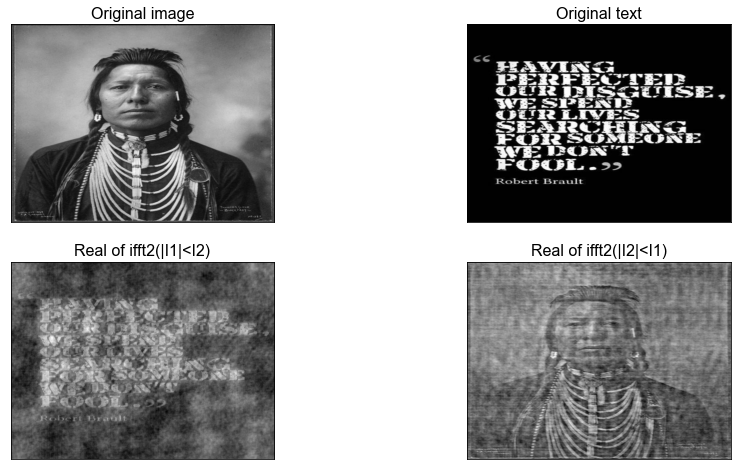

In [140]:
img = np.array(cv.imread('Images\\indian.jfif',cv.IMREAD_GRAYSCALE),dtype='uint8')
img = cv.resize(img,(800,600))
txt = np.array(cv.imread('Images\\text.jfif',cv.IMREAD_GRAYSCALE),dtype='uint8')
txt = cv.resize(txt,(800,600))
plots = [img,txt]
imgFFT = fft2(img)
textFFT = fft2(txt)
temp1 = np.abs(imgFFT) * np.exp(1j*np.angle(textFFT)) 
temp2 = np.abs(textFFT) * np.exp(1j*np.angle(imgFFT))
plots.append(np.real(ifft2(temp1)))
plots.append(np.real(ifft2(temp2)))
titles = ["Original image","Original text" , "Real of ifft2(|I1|<I2)" , "Real of ifft2(|I2|<I1)"]
fig , axis = plt.subplots(2,2 , figsize=[15,8])
for (index,ax) in itertools.zip_longest(range(0,2),axis):
    for (a,index2) in itertools.zip_longest(ax,range(0,2)):
        a.imshow(plots[index2+index*2],cmap="gray")
        a.set_title(titles[index2+index*2],**axis_font )
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)